<a href="https://colab.research.google.com/github/Likelipop/Data-mining/blob/main/Code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2>PART 1: TUTORIAL </h2>

# <h3>1.1 Load dataset </h3>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import os

FILE_PATH = os.path.join(os.getcwd(),"data.csv")
df = pd.read_csv(FILE_PATH)
df.set_index("ID", inplace = True)
df


,First Name,Last Name,Age,Gender,Department,Salary,Date of joining
ID,,,,,,,
1,John,Doe,25.0,M,Sales,50000.0,1/1/2020
2,jane,Smith,30.0,F,Marketing,60000.0,6/1/2018
3,Bod,Johnson,45.0,M,HR,70000.0,9/1/2016
4,Alice,Williams,33.0,F,IT,80000.0,2/1/2017
5,James,Brown,27.0,M,Sales,55000.0,3/1/2019
6,Sarah,Lee,NaN,F,Marketing,65000.0,12/1/2018
7,Michael,Davis,39.0,M,HR,NaN,8/1/2015
8,Susan,Miller,42.0,F,IT,9000.0,11/1/2014
9,David,Wilson,28.0,M,Sales,60000.0,5/1/2020


# <h3>1.2 Cleaning data </h3>

In [2]:
df.columns = [a.strip() for a in df.columns]

In [3]:
print(df.isnull().sum())

First Name         0
Last Name          0
Age                1
Gender             0
Department         0
Salary             1
Date of joining    0
dtype: int64


In [4]:

df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Salary"] = df["Salary"].fillna(df['Salary'].mean())

In [5]:
print(df.duplicated().sum())

2


In [6]:
df = df.drop_duplicates()
print(df)

   First Name Last Name        Age Gender Department        Salary  \
ID                                                                   
1        John       Doe  25.000000      M      Sales  50000.000000   
2        jane     Smith  30.000000      F  Marketing  60000.000000   
3         Bod   Johnson  45.000000      M         HR  70000.000000   
4       Alice  Williams  33.000000      F         IT  80000.000000   
5       James     Brown  27.000000      M      Sales  55000.000000   
6       Sarah       Lee  32.181818      F  Marketing  65000.000000   
7     Michael     Davis  39.000000      M         HR  54909.090909   
8       Susan    Miller  42.000000      F         IT   9000.000000   
9       David    Wilson  28.000000      M      Sales  60000.000000   
10      Emily     Brown  35.000000      F  Marketing  55000.000000   

   Date of joining  
ID                  
1         1/1/2020  
2         6/1/2018  
3         9/1/2016  
4         2/1/2017  
5         3/1/2019  
6        12/

In [7]:
df = pd.get_dummies(df, columns = ['Gender','Department'], dtype ='int' )

In [8]:
df

,First Name,Last Name,Age,Salary,Date of joining,Gender_F,Gender_M,Department_HR,Department_IT,Department_Marketing,Department_Sales
ID,,,,,,,,,,,
1,John,Doe,25.000000,50000.000000,1/1/2020,0,1,0,0,0,1
2,jane,Smith,30.000000,60000.000000,6/1/2018,1,0,0,0,1,0
3,Bod,Johnson,45.000000,70000.000000,9/1/2016,0,1,1,0,0,0
4,Alice,Williams,33.000000,80000.000000,2/1/2017,1,0,0,1,0,0
5,James,Brown,27.000000,55000.000000,3/1/2019,0,1,0,0,0,1
6,Sarah,Lee,32.181818,65000.000000,12/1/2018,1,0,0,0,1,0
7,Michael,Davis,39.000000,54909.090909,8/1/2015,0,1,1,0,0,0
8,Susan,Miller,42.000000,9000.000000,11/1/2014,1,0,0,1,0,0
9,David,Wilson,28.000000,60000.000000,5/1/2020,0,1,0,0,0,1


In [9]:
df['Date of joining'] = pd.to_datetime(df['Date of joining'])
df['month'] = df['Date of joining'].dt.month
df['day_of_week'] = df['Date of joining'].dt.day_name()
df = df.drop('Date of joining', axis =1)
df

,First Name,Last Name,Age,Salary,Gender_F,Gender_M,Department_HR,Department_IT,Department_Marketing,Department_Sales,month,day_of_week
ID,,,,,,,,,,,,
1,John,Doe,25.000000,50000.000000,0,1,0,0,0,1,1,Wednesday
2,jane,Smith,30.000000,60000.000000,1,0,0,0,1,0,6,Friday
3,Bod,Johnson,45.000000,70000.000000,0,1,1,0,0,0,9,Thursday
4,Alice,Williams,33.000000,80000.000000,1,0,0,1,0,0,2,Wednesday
5,James,Brown,27.000000,55000.000000,0,1,0,0,0,1,3,Friday
6,Sarah,Lee,32.181818,65000.000000,1,0,0,0,1,0,12,Saturday
7,Michael,Davis,39.000000,54909.090909,0,1,1,0,0,0,8,Saturday
8,Susan,Miller,42.000000,9000.000000,1,0,0,1,0,0,11,Saturday
9,David,Wilson,28.000000,60000.000000,0,1,0,0,0,1,5,Friday


In [10]:
df1 = df.drop(['First Name','Last Name','day_of_week'], axis= 1)
array = df1.values
print("Truoc khi bo cac gia tri nngoai lai\n",pd.DataFrame(array))

scaler = preprocessing.RobustScaler()
robust_df1 = scaler.fit_transform(array)
robust_df = pd.DataFrame(robust_df1)
robust_df
print("\n Sau khi bo cac gia tri ngoai lai\n", robust_df)

Truoc khi bo cac gia tri nngoai lai
            0             1    2    3    4    5    6    7     8
0  25.000000  50000.000000  0.0  1.0  0.0  0.0  0.0  1.0   1.0
1  30.000000  60000.000000  1.0  0.0  0.0  0.0  1.0  0.0   6.0
2  45.000000  70000.000000  0.0  1.0  1.0  0.0  0.0  0.0   9.0
3  33.000000  80000.000000  1.0  0.0  0.0  1.0  0.0  0.0   2.0
4  27.000000  55000.000000  0.0  1.0  0.0  0.0  0.0  1.0   3.0
5  32.181818  65000.000000  1.0  0.0  0.0  0.0  1.0  0.0  12.0
6  39.000000  54909.090909  0.0  1.0  1.0  0.0  0.0  0.0   8.0
7  42.000000   9000.000000  1.0  0.0  0.0  1.0  0.0  0.0  11.0
8  28.000000  60000.000000  0.0  1.0  0.0  0.0  0.0  1.0   5.0
9  35.000000  55000.000000  1.0  0.0  0.0  0.0  1.0  0.0   4.0

 Sau khi bo cac gia tri ngoai lai
           0         1    2    3    4    5         6         7         8
0 -0.799043 -0.850515 -0.5  0.5  0.0  0.0  0.000000  1.333333 -0.818182
1 -0.272727  0.283505  0.5 -0.5  0.0  0.0  1.333333  0.000000  0.090909
2  1.306220  1.417

# <h3>2.3 Normalization and Scaling </h3>

In [11]:
scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(array)
standard_df = pd.DataFrame(standard)
print("Chuan hoa du lieu \n", pd.DataFrame(standard))

scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(array)
minmax_df = pd.DataFrame(minmax, index = df.index)
print('Scaling du lieu: \n', minmax_df)

Chuan hoa du lieu 
           0         1    2    3    4    5         6         7         8
0 -1.369782 -0.332811 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -1.420508
1 -0.575077  0.232146  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.027853
2  1.809037  0.797102 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.807740
3 -0.098254  1.362058  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654 -1.141977
4 -1.051900 -0.050332 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.863446
5 -0.228297  0.514624  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654  1.643333
6  0.855391 -0.055468 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.529209
7  1.332214 -2.649132  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654  1.364802
8 -0.892959  0.232146 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.306384
9  0.219627 -0.050332  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.584915
Scaling du lieu: 
            0         1    2    3    4    5    6    7         8
ID                                                            
1   0.000000  0.577465  0.0  1.0  0.0  0.0 

# <h3>1.3 Equi Width and Equi Depth </h3>

In [12]:
df2 = standard_df.copy()
df2['equi_with_column0'] = pd.cut(x = df2[0], bins = 10)
print('Roi rac hoa cot 0 bang 10 equi width ranges: \n', df2)

Roi rac hoa cot 0 bang 10 equi width ranges: 
           0         1    2    3    4    5         6         7         8  \
0 -1.369782 -0.332811 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -1.420508   
1 -0.575077  0.232146  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.027853   
2  1.809037  0.797102 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.807740   
3 -0.098254  1.362058  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654 -1.141977   
4 -1.051900 -0.050332 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.863446   
5 -0.228297  0.514624  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654  1.643333   
6  0.855391 -0.055468 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.529209   
7  1.332214 -2.649132  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654  1.364802   
8 -0.892959  0.232146 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.306384   
9  0.219627 -0.050332  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.584915   

   equi_with_column0  
0   (-1.373, -1.052]  
1   (-0.734, -0.416]  
2     (1.491, 1.809]  
3    (-0.0983, 0.22]  
4   (-1.373,

In [13]:
df3 = standard_df.copy()
df3['equi_depth_column0'] = pd.qcut(x = df3[0], q = 10)
print('Roi rac hoa cot 0 bang 10 equi width ranges: \n', df3)

Roi rac hoa cot 0 bang 10 equi width ranges: 
           0         1    2    3    4    5         6         7         8  \
0 -1.369782 -0.332811 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -1.420508   
1 -0.575077  0.232146  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.027853   
2  1.809037  0.797102 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.807740   
3 -0.098254  1.362058  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654 -1.141977   
4 -1.051900 -0.050332 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.863446   
5 -0.228297  0.514624  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654  1.643333   
6  0.855391 -0.055468 -1.0  1.0  2.0 -0.5 -0.654654 -0.654654  0.529209   
7  1.332214 -2.649132  1.0 -1.0 -0.5  2.0 -0.654654 -0.654654  1.364802   
8 -0.892959  0.232146 -1.0  1.0 -0.5 -0.5 -0.654654  1.527525 -0.306384   
9  0.219627 -0.050332  1.0 -1.0 -0.5 -0.5  1.527525 -0.654654 -0.584915   

  equi_depth_column0  
0   (-1.371, -1.084]  
1    (-0.67, -0.367]  
2      (1.38, 1.809]  
3   (-0.163, 0.0289]  
4   (-1.084,

# <h2>PART 2: BAI TAP VAN DUNG </h2>

# <h3> 2.1. Load Library and Dataset</h3>

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer


In [19]:
arrhythmia_path = os.path.join(os.getcwd(), 'arrhythmia.zip')
!unzip {arrhythmia_path}


Archive:  /workspaces/Data-mining/Lab01/arrhythmia.zip
replace arrhythmia.data? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [32]:
arhythmia_data_path = os.path.join(os.getcwd(), 'arrhythmia.data')
df = pd.read_csv(arhythmia_data_path, header = None, sep = ',')
df


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


As observed above, the dataset has no column's name. We can refer to arrhythmia.names for additional information, which will help us initillize the column names later, then we should take a look at data's summary 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


# <h3> 2.2. Preprocessing data: incompactible value ,Missing value, Duplicates, Outliers removal</h3>

There is 452 records, and each of them has 280 fields of data. Take a closer look, we may notice there is something wrong about dtypes : object(5). It gave me some intution about incorrect format data. Lets have a walk around at the data.

In [34]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(df[column].head())

0    13
1    37
2    34
3    11
4    13
Name: 10, dtype: object
0     64
1    -17
2     70
3     -5
4     61
Name: 11, dtype: object
0    -2
1    31
2    66
3    20
4     3
Name: 12, dtype: object
0     ?
1     ?
2    23
3     ?
4     ?
Name: 13, dtype: object
0    63
1    53
2    75
3    71
4     ?
Name: 14, dtype: object


In [36]:
print("Giá trị ? :\n")
for column in df.columns:
    if (df[column] == '?').sum() :
       print(f"column {column}:  {(df[column] == '?').sum()}")

Giá trị ? :

column 10:  8
column 11:  22
column 12:  1
column 13:  376
column 14:  1


So we replace "?" inside our dataset by np.nan for the ease of handling missing value.

In [37]:
df = df.replace('?', np.nan)

In [38]:
print("Giá trị ? :\n")
for column in df.columns:
    if (df[column] == '?').sum() :
       print(f"{column}:  {(df[column] == '?').sum()}")

Giá trị ? :



so there is no "?" in ours dataset, lets move on handling missing value and duplicates

In [39]:
#check giá trị thiếu
print("Giá trị thiếu :\n",(df.isnull().sum() > 0).sum() )
#check giá trị trùng
print("Giá trị trùng: \n",df.duplicated().sum())


Giá trị thiếu :
 5
Giá trị trùng: 
 0


In [ ]:
# df = df.apply(pd.to_numeric, errors = 'coerce')

We fill the hole in ours data with the mean of each columns.

In [40]:
A= df.select_dtypes(include=['number'])
A.fillna(A.mean())

df[df.select_dtypes(include=['number']).columns] = A

In [44]:
#check giá trị thiếu sau khi xử lý
for column in df.select_dtypes(include=['number']).columns:
    if df[column].isnull().sum() > 0:
        print(f" columns {column}: {df[column].isnull().sum()}")

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


So there is no missing value in numeric columns.

# <h3> 2.3. Normalization and scaling</h3>

<h4> 2.3.1 Outliers removal and Normalization using Standard scaler </h4>

In [45]:
array = df.values
# Outliers remove
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(array)
robust_df= pd.DataFrame(robust_df)

#Normalization using z score
scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(array)
standard_df = pd.DataFrame(standard,index = df.index)
print("Chuan hoa du lieu: \n")
print(standard_df.head())


Chuan hoa du lieu: 

        0         1         2         3         4         5         6    \
0  1.734439 -1.107520  0.641327  0.713814  0.135505  0.844945  0.113709   
1  0.579312  0.902918 -0.031998 -0.251644 -0.516072  0.420769  1.013301   
2  0.457720 -1.107520  0.156533  1.618932  3.197915  0.175193  0.563505   
3  0.518516 -1.107520  0.237332  1.558590  0.721924  1.045871  0.383587   
4  1.734439 -1.107520  0.641327  0.713814 -0.059968  0.577044 -0.216141   

        7         8         9    ...       270       271       272       273  \
0  0.113809  1.201469 -1.094661  ...  0.508843 -0.013839  0.278621 -0.079546   
1 -0.588564 -1.977064 -0.191203  ...  0.508843 -0.157972  0.728573 -0.079546   
2  0.422853  0.464980  1.373324  ...  0.508843  0.130294 -0.471299 -0.079546   
3  0.254284  2.054247 -0.125096  ...  0.508843  0.908612 -0.371310 -0.079546   
4  0.198094  0.503742 -1.094661  ...  0.508843  1.168051 -1.071235 -0.079546   

   274       275       276       277       278 

<h4> 2.3.2 Min - Max scaling </h4>

In [49]:
#Max - Min Scaling
scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(array)
minmax_df = pd.DataFrame(minmax, index = df.index)
print("\nMin max scalinng : \n")
print(minmax_df.head())


Min max scalinng : 

        0    1         2         3         4         5         6         7    \
0  0.903614  0.0  0.125926  0.435294  0.270677  0.368321  0.501805  0.241758   
1  0.674699  1.0  0.088889  0.341176  0.195489  0.332061  0.610108  0.150183   
2  0.650602  0.0  0.099259  0.523529  0.624060  0.311069  0.555957  0.282051   
3  0.662651  0.0  0.103704  0.517647  0.338346  0.385496  0.534296  0.260073   
4  0.903614  0.0  0.125926  0.435294  0.248120  0.345420  0.462094  0.252747   

        8         9    ...  270       271       272  273  274      275  \
0  0.590244  0.457478  ...  1.0  0.381356  0.968531  0.0  0.0  0.53125   
1  0.190244  0.577713  ...  1.0  0.360169  1.000000  0.0  0.0  0.31250   
2  0.497561  0.785924  ...  1.0  0.402542  0.916084  0.0  0.0  0.34375   
3  0.697561  0.586510  ...  1.0  0.516949  0.923077  0.0  0.0  0.37500   
4  0.502439  0.457478  ...  1.0  0.555085  0.874126  0.0  0.0  0.21875   

        276       277       278       279  
0  0.741

<h4> 2.3.3 Discretization </h4>

Ở đây em dùng pd.cut để thực hiện equl width

In [93]:
df2 = standard_df.__deepcopy__()
numeric_col = df2.select_dtypes(include = ['number']).columns
for column in numeric_col:
    df2[str(column) + "equi_width"] = pd.cut(x = df2[column], bins= 10)

df2.head()


,0,1,2,3,4,5,6,7,8,9,...,270equi_width,271equi_width,272equi_width,273equi_width,274equi_width,275equi_width,276equi_width,277equi_width,278equi_width,279equi_width
0,1.734439,-1.107520,0.641327,0.713814,0.135505,0.844945,0.113709,0.113809,1.201469,-1.094661,...,"(-0.239, 0.509]","(-0.567, 0.113]","(-0.701, 0.729]","(-0.0955, 1.518]","(-0.0002, 0.0]","(0.821, 1.743]","(0.827, 1.669]","(0.22, 1.206]","(0.497, 1.333]","(0.709, 1.049]"
1,0.579312,0.902918,-0.031998,-0.251644,-0.516072,0.420769,1.013301,-0.588564,-1.977064,-0.191203,...,"(-0.239, 0.509]","(-0.567, 0.113]","(-0.701, 0.729]","(-0.0955, 1.518]","(-0.0002, 0.0]","(-1.022, -0.1]","(-0.0157, 0.827]","(-0.766, 0.22]","(0.497, 1.333]","(0.368, 0.709]"
2,0.457720,-1.107520,0.156533,1.618932,3.197915,0.175193,0.563505,0.422853,0.464980,1.373324,...,"(-0.239, 0.509]","(0.113, 0.793]","(-0.701, 0.729]","(-0.0955, 1.518]","(-0.0002, 0.0]","(-1.022, -0.1]","(0.827, 1.669]","(-0.766, 0.22]","(0.497, 1.333]","(1.39, 1.731]"
3,0.518516,-1.107520,0.237332,1.558590,0.721924,1.045871,0.383587,0.254284,2.054247,-0.125096,...,"(-0.239, 0.509]","(0.793, 1.474]","(-0.701, 0.729]","(-0.0955, 1.518]","(-0.0002, 0.0]","(-1.022, -0.1]","(0.827, 1.669]","(0.22, 1.206]","(1.333, 2.169]","(-0.658, -0.314]"
4,1.734439,-1.107520,0.641327,0.713814,-0.059968,0.577044,-0.216141,0.198094,0.503742,-1.094661,...,"(-0.239, 0.509]","(0.793, 1.474]","(-2.131, -0.701]","(-0.0955, 1.518]","(-0.0002, 0.0]","(-1.944, -1.022]","(1.669, 2.512]","(0.22, 1.206]","(1.333, 2.169]","(0.368, 0.709]"


Tại đây em sử dụng qcut để thực hiện equi_depth để đảm bảo số lượng bins như ý = 10, tuy nhiên khi chạy bị lỗi thì em có để arg duplicates = 'drop', điều này sẽ loại bỏ các giá trị bằng nhau (chừa lại một cái) xuyên suốt các cột.

In [97]:
df2 = standard_df.__deepcopy__()
numeric_col = df2.select_dtypes(include = ['number']).columns
for column in numeric_col:
    # if df2[column].value_counts().unique().shape[0] > 25: 
        df2[str(column) + "equi_depth"] = pd.qcut(x = df2[column], q= 10, duplicates = 'drop')

df2.head()


,0,1,2,3,4,5,6,7,8,9,...,270equi_depth,271equi_depth,272equi_depth,273equi_depth,274equi_depth,275equi_depth,276equi_depth,277equi_depth,278equi_depth,279equi_depth
0,1.734439,-1.107520,0.641327,0.713814,0.135505,0.844945,0.113709,0.113809,1.201469,-1.094661,...,"(-0.221, 0.509]","(-0.0715, 0.188]","(0.179, 0.329]","(-0.0805, 15.9]",NaN,"(0.821, 1.11]","(1.108, 3.354]","(0.198, 0.391]","(0.839, 1.268]","(0.0271, 0.936]"
1,0.579312,0.902918,-0.031998,-0.251644,-0.516072,0.420769,1.013301,-0.588564,-1.977064,-0.191203,...,"(-0.221, 0.509]","(-0.273, -0.0715]","(0.329, 0.729]","(-0.0805, 15.9]",NaN,"(-1.166, -0.619]","(0.476, 0.757]","(-0.0909, 0.198]","(0.458, 0.839]","(0.0271, 0.936]"
2,0.457720,-1.107520,0.156533,1.618932,3.197915,0.175193,0.563505,0.422853,0.464980,1.373324,...,"(-0.221, 0.509]","(-0.0715, 0.188]","(-0.971, -0.471]","(-0.0805, 15.9]",NaN,"(-1.166, -0.619]","(1.108, 3.354]","(-0.721, -0.491]","(0.839, 1.268]","(0.936, 1.39]"
3,0.518516,-1.107520,0.237332,1.558590,0.721924,1.045871,0.383587,0.254284,2.054247,-0.125096,...,"(-0.221, 0.509]","(0.822, 1.255]","(-0.471, -0.221]","(-0.0805, 15.9]",NaN,"(-0.619, -0.331]","(0.757, 1.108]","(0.642, 1.147]","(1.268, 4.678]","(-0.655, -0.427]"
4,1.734439,-1.107520,0.641327,0.713814,-0.059968,0.577044,-0.216141,0.198094,0.503742,-1.094661,...,"(-0.221, 0.509]","(0.822, 1.255]","(-13.571, -0.971]","(-0.0805, 15.9]",NaN,"(-3.7889999999999997, -1.166]","(1.108, 3.354]","(0.391, 0.642]","(1.268, 4.678]","(0.0271, 0.936]"


# <h2>PART 3: PCA </h2>

# <h3>3.1 Load dataset </h3>

In [98]:
!pip install ucimlrepo


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [99]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
musk_version_1 = fetch_ucirepo(id=74) 
  
# data (as pandas dataframes) 
X = musk_version_1.data.features 
y = musk_version_1.data.targets 
  
# metadata 
print(musk_version_1.metadata) 
  
# variable information 
print(musk_version_1.variables) 


{'uci_id': 74, 'name': 'Musk (Version 1)', 'repository_url': 'https://archive.ics.uci.edu/dataset/74/musk+version+1', 'data_url': 'https://archive.ics.uci.edu/static/public/74/data.csv', 'abstract': 'The goal is to learn to predict whether new molecules will be musks or non-musks', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 476, 'num_features': 168, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5ZK5B', 'creators': ['David Chapman', 'Ajay Jain'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset describes a set of 92 molecules of which 47 are judged by human experts to be musks and the remaining 45 molecules are judged to be non-musks.  The goal is to learn to predict whether new molecules will be mus

# <h3>3.1 extract columns </h3>

Ta thấy rằng các giá trị số sẽ nằm trải dài từ côt f1 đến f166, ta muốn giảm chiều trên ma trận chứa các cột số này nên ta sẽ trích xuất chúng ra.

In [100]:
df = pd.DataFrame(X)
df.head()

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,MUSK-188,188_1+1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30
1,MUSK-188,188_1+2,42,-191,-142,-65,-117,55,49,-170,...,-238,-302,60,-120,-39,31,48,-37,5,30
2,MUSK-188,188_1+3,42,-191,-142,-75,-117,11,49,-161,...,-238,-73,-127,-120,-38,30,48,-37,5,31
3,MUSK-188,188_1+4,42,-198,-110,-65,-117,55,23,-95,...,-238,-302,60,-120,-39,30,48,-37,6,30
4,MUSK-190,190_1+1,42,-198,-102,-75,-117,10,24,-87,...,-238,-73,-127,51,128,144,43,-30,14,26


In [132]:
from sklearn.decomposition import PCA

numeric_col = df.select_dtypes(include = ['number']).columns
numeric_data = df[numeric_col]
pca = PCA(n_components=10)
pca.fit(numeric_data)


PCA(n_components=10)

# <h3>3.2 Interpretation </h3>

eigen values : 453239.5824762157 144753.81184436462 77810.62752619636 62335.68439338027 49078.05359871978 46721.80964995811 30678.169203812227 23608.912850563367 18173.24933061291 17244.439448813042


[Text(0.5, 1.0, 'PCA explained variance')]

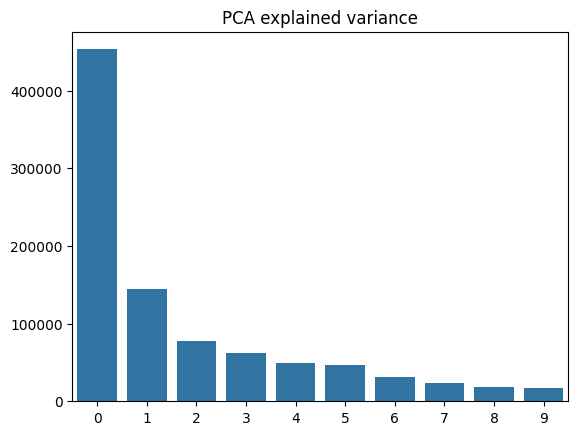

In [143]:
import seaborn as sns

print("eigen values :"," ".join([f"{x}" for x in pca.explained_variance_]))
sns.barplot(data = pca.explained_variance_).set( title = "PCA explained variance")



Dựa vào sơ đồ, ta thấy các eigen values giảm rất mạnh, tức rằng chỉ có một vài eigen values đầu sẽ bổ ích trong việc thu giữ chiều mà data có độ trải là lớn nhất, còn các chiều khác có thể không quan trọng bằng, hoặc còn có thể coi là nhiễu 

In [138]:
principal_components = pd.DataFrame(data = pca.components_)
principal_components

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,0.006075,0.059143,0.066287,-0.072310,-0.000120,0.065271,-0.144172,0.006772,-0.128568,0.066516,...,0.019170,0.055214,0.154392,0.029909,0.023274,0.012668,0.001128,0.000008,0.001592,-0.007301
1,-0.000593,-0.023760,-0.001792,0.005775,-0.001250,0.000246,-0.043339,0.156841,-0.035402,0.055194,...,0.026384,0.045200,0.020395,-0.018382,-0.010825,-0.003739,-0.008104,0.005052,0.016978,-0.007020
2,0.021546,0.207846,0.130939,-0.028570,0.001248,-0.050651,0.038849,-0.001657,0.023972,0.029043,...,0.000804,0.007559,-0.012178,0.124025,0.039838,0.036022,0.006997,0.000366,0.019436,0.052880
3,0.006453,-0.111237,-0.049284,-0.053595,0.003256,0.072353,0.101242,-0.014254,0.086627,0.126181,...,0.025286,0.151227,0.140471,-0.021573,0.032520,0.020534,-0.076906,0.010814,0.084785,-0.037824
4,-0.007789,0.037349,-0.011672,0.148719,-0.011648,0.289475,0.011782,0.018151,-0.003542,-0.028329,...,0.037659,-0.002045,0.090658,-0.064405,-0.126874,-0.009983,0.073918,0.015106,-0.044299,0.084233
5,0.004240,-0.074579,-0.111885,-0.023840,0.003411,-0.083263,-0.005966,-0.001746,0.008701,-0.015433,...,-0.040819,-0.052230,-0.038317,0.034866,-0.103262,0.033837,-0.003995,0.026056,0.084568,0.133306
6,0.007671,0.063313,0.037608,0.002243,0.007716,0.043803,-0.053410,0.018481,0.008871,-0.109140,...,0.037288,-0.095614,0.051792,0.069449,0.107045,0.030813,0.007833,-0.023838,-0.072510,-0.045353
7,0.047946,-0.080915,-0.077113,0.002225,0.047295,0.081087,0.011644,-0.028161,0.011740,-0.011496,...,0.070806,0.052662,0.015486,0.252101,0.423371,0.234918,-0.064336,-0.027907,0.007225,-0.090663
8,-0.000603,0.026245,0.005887,0.285689,-0.003338,-0.066027,-0.009737,-0.029745,0.022115,-0.013119,...,-0.065826,-0.001374,-0.073063,0.006062,0.053556,0.008477,-0.010907,-0.018549,-0.035885,-0.059495
9,-0.006075,0.093183,0.049970,0.014165,-0.006466,-0.041451,-0.000388,-0.097709,0.091603,0.030795,...,0.123299,0.329222,-0.028501,0.024993,-0.033127,-0.024322,0.030514,-0.005898,-0.052049,0.033869
